# More examples

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import xarray as xr
import xesmf as xe

## Curvilinear grid with missing value

In [2]:
ds = xr.tutorial.load_dataset('rasm')
ds

<xarray.Dataset>
Dimensions:  (time: 36, x: 275, y: 205)
Coordinates:
  * time     (time) datetime64[ns] 1980-09-16T12:00:00 1980-10-17 ...
    xc       (y, x) float64 189.2 189.4 189.6 189.7 189.9 190.1 190.2 190.4 ...
    yc       (y, x) float64 16.53 16.78 17.02 17.27 17.51 17.76 18.0 18.25 ...
Dimensions without coordinates: x, y
Data variables:
    Tair     (time, y, x) float64 nan nan nan nan nan nan nan nan nan nan ...
Attributes:
    title:                     /workspace/jhamman/processed/R1002RBRxaaa01a/l...
    institution:               U.W.
    source:                    RACM R1002RBRxaaa01a
    output_frequency:          daily
    output_mode:               averaged
    convention:                CF-1.4
    references:                Based on the initial model of Liang et al., 19...
    comment:                   Output from the Variable Infiltration Capacity...
    nco_openmp_thread_number:  1
    NCO:                       "4.6.0"
    history:                   Tue Dec 2

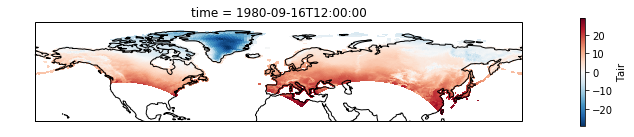

In [3]:
plt.figure(figsize=(12,2));
ax = plt.axes(projection=ccrs.PlateCarree());
ds['Tair'][0].plot.pcolormesh(ax=ax, x='xc', y='yc');
ax.coastlines();

In [4]:
ds.rename({'xc': 'lon', 'yc': 'lat'}, inplace=True)
ds

<xarray.Dataset>
Dimensions:  (time: 36, x: 275, y: 205)
Coordinates:
  * time     (time) datetime64[ns] 1980-09-16T12:00:00 1980-10-17 ...
    lon      (y, x) float64 189.2 189.4 189.6 189.7 189.9 190.1 190.2 190.4 ...
    lat      (y, x) float64 16.53 16.78 17.02 17.27 17.51 17.76 18.0 18.25 ...
Dimensions without coordinates: x, y
Data variables:
    Tair     (time, y, x) float64 nan nan nan nan nan nan nan nan nan nan ...
Attributes:
    title:                     /workspace/jhamman/processed/R1002RBRxaaa01a/l...
    institution:               U.W.
    source:                    RACM R1002RBRxaaa01a
    output_frequency:          daily
    output_mode:               averaged
    convention:                CF-1.4
    references:                Based on the initial model of Liang et al., 19...
    comment:                   Output from the Variable Infiltration Capacity...
    nco_openmp_thread_number:  1
    NCO:                       "4.6.0"
    history:                   Tue Dec 2

In [5]:
ds_out = xe.util.grid_global(5, 4)

In [6]:
regridder = xe.Regridder(ds, ds_out, 'bilinear')

Create weight file: bilinear_205x275_45x72.nc


In [7]:
dr_out = regridder(ds['Tair'])

In [8]:
dr_out

<xarray.DataArray 'Tair' (time: 36, y: 45, x: 72)>
array([[[  0.,   0., ...,   0.,   0.],
        [  0.,   0., ...,   0.,   0.],
        ..., 
        [ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan]],

       [[  0.,   0., ...,   0.,   0.],
        [  0.,   0., ...,   0.,   0.],
        ..., 
        [ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan]],

       ..., 
       [[  0.,   0., ...,   0.,   0.],
        [  0.,   0., ...,   0.,   0.],
        ..., 
        [ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan]],

       [[  0.,   0., ...,   0.,   0.],
        [  0.,   0., ...,   0.,   0.],
        ..., 
        [ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan]]])
Coordinates:
    lon      (y, x) float64 -177.5 -172.5 -167.5 -162.5 -157.5 -152.5 -147.5 ...
    lat      (y, x) float64 -88.0 -88.0 -88.0 -88.0 -88.0 -88.0 -88.0 -88.0 ...
  * time     (time) datetime64[ns] 1980-09-16T12:00:00 1980-10-17 ...
Dime

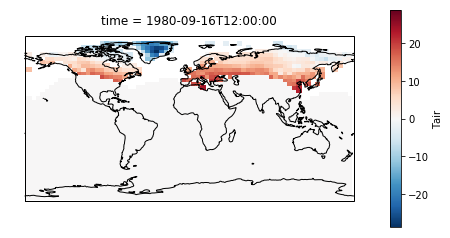

In [9]:
plt.figure(figsize=(8,4));
ax = plt.axes(projection=ccrs.PlateCarree());
dr_out[0].plot.pcolormesh(ax=ax, x='lon', y='lat');
ax.coastlines();

## Coordinate as 1D array

In [10]:
ds = xr.tutorial.load_dataset('air_temperature')
ds

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 62.5 60.0 57.5 55.0 52.5 ...
  * lon      (lon) float32 200.0 202.5 205.0 207.5 210.0 212.5 215.0 217.5 ...
  * time     (time) datetime64[ns] 2013-01-01T00:02:06.757437440 ...
Data variables:
    air      (time, lat, lon) float64 241.2 242.5 243.5 244.0 244.1 243.9 ...
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

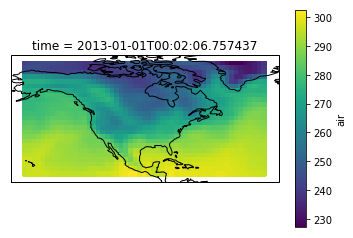

In [11]:
dr = ds['air']
ax = plt.axes(projection=ccrs.PlateCarree())
dr.isel(time=0).plot.pcolormesh(ax=ax);
ax.coastlines();